# AirBnB Pricing Recommender for Tokyo

This notebook will focus on pre-processing the data to prepare it for exploratory data analysis and modeling.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score

import xgboost as xgb
from xgboost import plot_importance

%matplotlib inline

In [154]:
df = pd.read_pickle('with_scores.pkl')

In [155]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neg_score,neu_score,pos_score
0,197677,https://www.airbnb.com/rooms/197677,20190928054933,2019-09-28,Oshiage Holiday Apartment,NaN,"We are happy to welcome you to our apartment, ...","We are happy to welcome you to our apartment, ...",none,NaN,...,f,f,1,1,0,0,1.63,0.000,1.000,0.000
1,776070,https://www.airbnb.com/rooms/776070,20190928054933,2019-09-28,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,"INTRO ε(*´･･`)зﾞHey""ε(´･･`*)з *TAKE NOTE* Jus...",We have been in airbnb since 2011 and it has g...,none,We love Nishinippori because is nearer to Toky...,...,t,t,1,0,1,0,2.64,0.025,0.640,0.335
2,905944,https://www.airbnb.com/rooms/905944,20190928054933,2019-09-28,4F - Near Shinjuku & Shibuya w/Free WiFi,License M (Phone number hidden by Airbnb) Enti...,Welcome and thank you for reading the details ...,License M (Phone number hidden by Airbnb) Enti...,none,Hatagaya is a great neighborhood located 4 min...,...,f,f,8,7,1,0,2.24,0.048,0.685,0.268
3,1016831,https://www.airbnb.com/rooms/1016831,20190928054933,2019-09-28,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,female travellers here only. Sorry no boys and...,We offer quite and peaceful private 6 tatami r...,female travellers here only. Sorry no boys and...,none,The location is walkable distance to famous Sh...,...,t,t,1,0,1,0,2.55,0.000,1.000,0.000
4,1096292,https://www.airbnb.com/rooms/1096292,20190928054933,2019-09-28,Home stay with a Japanese language teacher fam...,★*:.★*:. Must Read .:*★.:*★ *:.This price is ...,★*:.★*:. Must Read 2 .:*★.:*★ *:.We don't wan...,★*:.★*:. Must Read .:*★.:*★ *:.This price is ...,none,NaN,...,f,f,2,0,2,0,3.22,0.000,0.776,0.224


## Description of each column:
- **experiences_offered** - slightly unclear as it does not appear to directly relate to Airbnb - Experiences, but this seems to be the main recommended category of travel type, e.g. business  
    
- **host_since** - date that the host first joined Airbnb
- **host_response_time** - average amount of time the host takes to reply to messages
- **host_response_rate** - proportion of messages that the host replies to
- **host_is_superhost** - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
- **host_listings_count** - how many listings the host has in total
- **host_identity_verified** - whether or not the host has been verified with id
- **neighbourhood_cleansed** - the London borough the property is in
- **property_type** - type of property, e.g. house or flat
- **room_type** - type of listing, e.g. entire home, private room or shared room
- **accommodates** - how many people the property accommodates
- **bathrooms** - number of bathrooms
- **bedrooms** - number of bedrooms
- **beds** - number of beds
- **bed_type** - type of bed, e.g. real bed or sofa-bed
- **amenities** - list of amenities
- **price** - nightly advertised price (the target variable)
- **security_deposit** - the amount required as a security deposit
- **cleaning_fee** - the amount of the cleaning fee (a fixed amount paid per booking)
- **guests_included** - the number of guests included in the booking fee
- **extra_people** - the price per additional guest above the guests_included price
- **minimum_nights** - the minimum length of stay
- **maximum_nights** - the maximum length of stay
- **calendar_updated** - when the host last updated the calendar
- **availability_30** - how many nights are available to be booked in the next 30 days
- **availability_60** - how many nights are available to be booked in the next 60 days
- **availability_90** - how many nights are available to be booked in the next 90 days
- **availability_365** - how many nights are available to be booked in the next 365 days
- **number_of_reviews** - the number of reviews left for the property
- **number_of_reviews_ltm** - the number of reviews left for the property in the last twelve months
- **first_review** - the date of the first review
- **last_review** - the date of the most recent review
- **review_scores_rating** - guests can score properties overall from 1 to 5 stars
- **review_scores_accuracy** - guests can score the accuracy of a property's description from 1 to 5 stars
- **review_scores_cleanliness** - guests can score a property's cleanliness from 1 to 5 stars
- **review_scores_checkin** - guests can score their check-in from 1 to 5 stars
- **review_scores_communication** - guests can score a host's communication from 1 to 5 stars
- **review_scores_location** - guests can score a property's location from 1 to 5 stars
- **review_scores_value** - guests can score a booking's value for money from 1 to 5 stars
- **instant_bookable** - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
- **cancellation_policy** - the type of cancellation policy, e.g. strict or moderate
- **reviews_per_month** - calculated field of the average number of reviews left by guest each month

## Column Filtering

In [156]:
df.shape

(5641, 109)

In [157]:
selected_cols = ['listing_url', 'id', 'name', 'description', 'neighborhood_overview', 'notes',
                 'transit', 'house_rules', 'host_response_time', 'host_response_rate',
                 'host_is_superhost', 'host_neighbourhood', 'neighbourhood_cleansed',
                 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
                 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 
                 'security_deposit', 'guests_included',
                 'extra_people', 'minimum_nights', 'maximum_nights',
                 'availability_30', 'availability_365', 'has_availability', 'number_of_reviews',
                 'number_of_reviews_ltm', 'last_scraped', 'last_review', 'review_scores_rating', 
                 'review_scores_accuracy', 'review_scores_cleanliness', 
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                 'review_scores_value', 'reviews_per_month', 'neg_score', 'neu_score', 'pos_score'
                ]

df = df[selected_cols]
text_df = df.iloc[:,1:8]  #text based dataframe for NLP purposes
df.drop(df.columns[2:8],axis=1, inplace=True) #drop text columns

In [158]:
df.shape

(5641, 41)

In [159]:
df.dropna(axis=0, subset=['host_neighbourhood'], inplace=True)

## Price Conversion

Default prices in this dataset are in Japanese yen. Converting it to USD will allow an English audience to better understand the data.

In [160]:
df['security_deposit'] = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df['extra_people'] = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [161]:
df['security_deposit'] = 0.0092 * df['security_deposit']
df['price'] = 0.0092 * df['price']
df['security_deposit'].fillna(0, inplace=True)

In [162]:
df[df['price'] > 300].shape

(0, 41)

In [163]:
df['price'].nlargest(25)

3106    299.7912
409     297.8040
410     297.8040
412     297.8040
833     297.8040
892     297.8040
1190    297.8040
1233    297.8040
1489    297.8040
2550    297.8040
3025    297.8040
3338    297.8040
3521    297.8040
4152    297.8040
4439    297.8040
4445    297.8040
4879    297.8040
5016    297.8040
5021    297.8040
5068    297.8040
434     296.8104
481     296.8104
912     296.8104
4642    295.8168
5       294.8232
Name: price, dtype: float64

In [164]:
df.loc[1033]

listing_url                                https://www.airbnb.com/rooms/19368458
id                                                                      19368458
host_response_time                                                within an hour
host_response_rate                                                          100%
host_is_superhost                                                              f
host_neighbourhood                                               Minato District
neighbourhood_cleansed                                                 Nakano Ku
latitude                                                                 35.6877
longitude                                                                139.668
property_type                                                          Apartment
room_type                                                        Entire home/apt
accommodates                                                                  12
bathrooms                   

In [165]:
df.dropna(inplace=True)

In [166]:
df.isna().sum()

listing_url                    0
id                             0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_neighbourhood             0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
amenities                      0
price                          0
security_deposit               0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_365               0
has_availability               0
number_of_reviews              0
number_of_reviews_ltm          0
last_scraped                   0
last_review                    0
review_sco

## Feature Engineering

### Number of Days Since Last Review

When recommending prices to hosts, it's important to train a model on **active** listings that tend to have a lot of traffic. This ensures that the model isn't conditioned on more mediocre listings that don't enjoy a lot of traffic, either due to poor pricing, advertising, or other factors.

One of the ways I chose to filter out bad listings was to ensure that listings have been **reviewed at least once in the last 6 months.** While a smaller interval of 1 month would be more stringent, reviews are very dependent on whether a customer chooses to do so or not so I chose to relax the threshold to around 6 months. 

In [167]:
df['last_scraped'] = pd.to_datetime(df['last_scraped'], format="%Y-%m-%d")
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y-%m-%d")
df['since_last_review'] = df['last_scraped'] - df['last_review']  
df['since_last_review'] = df['since_last_review'].dt.days

In [168]:
df = df[df['since_last_review'] < 183]
df = df[df['number_of_reviews_ltm'] > 5]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


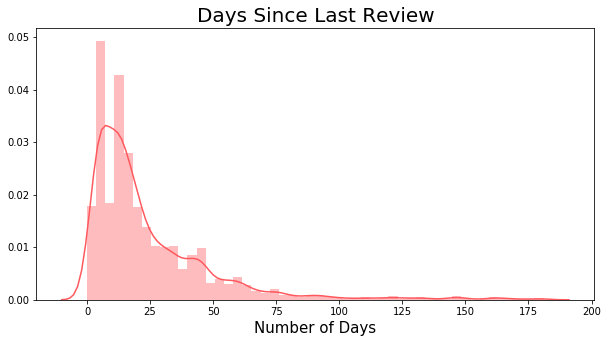

In [169]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.distplot(df['since_last_review'], color='#FF585D')
ax.set_title('Days Since Last Review', fontsize=20);
ax.set_xlabel("Number of Days",fontsize=15);

### Removing Outliers

Handling outliers is very important when we want to fit a regression model. Something to keep in mind is how many people a listing can accomodate.For now, I am going to remove extremely large listings such as those than can accomodate more than 10 people. Listing that can accomodate >10 people are a miniority and can skew the regression line.

In [170]:
df['accommodates'].value_counts()

2     1498
3     1041
4      956
6      536
5      441
8      285
1      241
7      199
10     144
9       90
12      80
16      49
11      40
14      20
13      14
15       7
Name: accommodates, dtype: int64

## Price Processing

Price is our target variable so it would be useful to get a sense of the distribution.

In [171]:
df['price'].describe()

count    5641.000000
mean      112.601573
std        64.932464
min         9.926800
25%        63.535200
50%        92.322000
75%       146.914800
max       299.791200
Name: price, dtype: float64

In [172]:
df = df[df['price'] < 300]

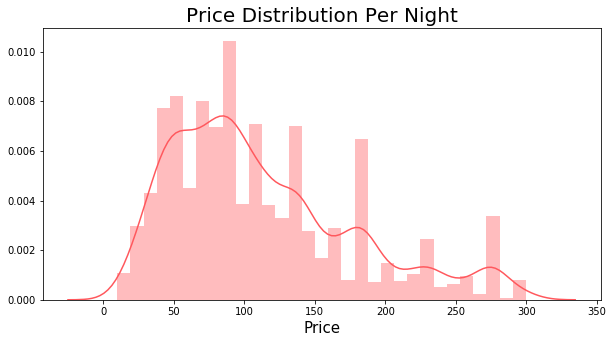

In [173]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.distplot(df['price'], color='#FF585D')
ax.set_title('Price Distribution Per Night', fontsize=20);
ax.set_xlabel('Price', fontsize=15);


In [174]:
df[df['price'] < 150].shape[0] / df['price'].shape[0] * 100

76.68853040241092

Something important to note is that **76.69%** of listings are priced under 150/night. As a result, I think having two seperate models, one for under and above the threshold of $150/night will lead to better performance than simply using a single model for all listings.
Let's take a look at the listing distribution if we use this threshold.

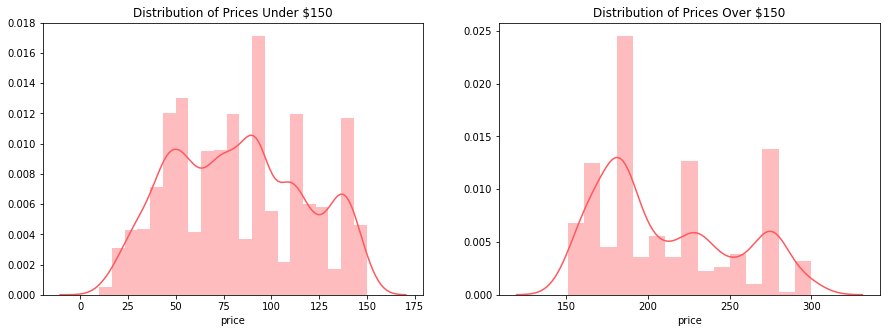

In [175]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

ax0 = sns.distplot(df[df['price'] <= 150]['price'], ax=axs[0], color='#FF585D')
ax0.set_title('Distribution of Prices Under $150')

ax1 = sns.distplot(df[df['price'] > 150]['price'], ax=axs[1], color='#FF585D')
ax1.set_title('Distribution of Prices Over $150');

### Property Filtering

In [176]:
df['property_type'].value_counts()

Apartment             3781
House                  944
Hostel                 275
Condominium            202
Serviced apartment     101
Aparthotel              74
Hotel                   63
Boutique hotel          41
Ryokan (Japan)          35
Villa                   34
Loft                    18
Hut                     18
Guesthouse              17
Townhouse               10
Guest suite              9
Bungalow                 5
Tiny house               5
Bed and breakfast        3
Cabin                    2
Dome house               2
Dorm                     1
Camper/RV                1
Name: property_type, dtype: int64

In [177]:
df['property_type'].replace({
    'Serviced Apartment' : 'Apartment',
    'Aparthotel' : 'Apartment',
    'Villa' : 'House',
    'Boutique hotel' : 'Hotel',
    'Hut' : 'House',
    'Guesthouse' : 'House',
    'Townhouse' : 'House',
    'Tiny house' : 'House',
    'Bungalow' : 'House',
    'Bed and breakfast' : 'Other',
    'Loft' : 'Other',
    'Guest suite' : 'Other',
    'Camper/RV' : 'Other',
    'Dorm' : 'Other',
    'Cabin' : 'Other'  
}, inplace=True)

## San Francisco Model

**Estimated Monthly Bookings = (# Of Reviews Per Month / Review Rate)**

**# Of Booked Days Per Month = Avg Length of Stay * Estimated Monthly Bookings**

**Monthly Revenue = # of Booked Days Per Month * Daily Price**

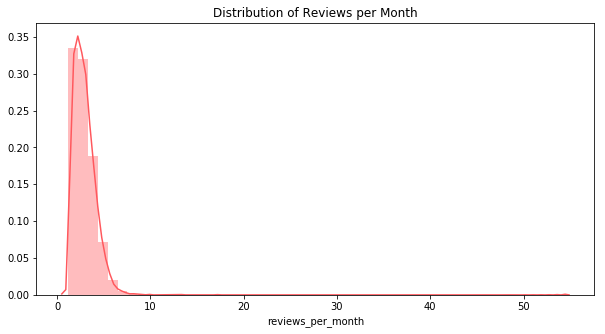

In [178]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(df['reviews_per_month'], color='#FF585D')
ax.set_title("Distribution of Reviews per Month");

In [179]:
df['reviews_per_month'].shape

(5641,)

In [180]:
df[df['reviews_per_month'] <= 5].shape

(5362, 42)

In [181]:
review_rate = 0.5
avg_length_stay = 3

monthly_bookings = np.array(df['reviews_per_month'] / review_rate)
booked_days_month = np.minimum(30, avg_length_stay * monthly_bookings)
df['booked_days'] = booked_days_month
monthly_revenue = booked_days_month * df['price']
df['monthly_revenue'] = monthly_revenue

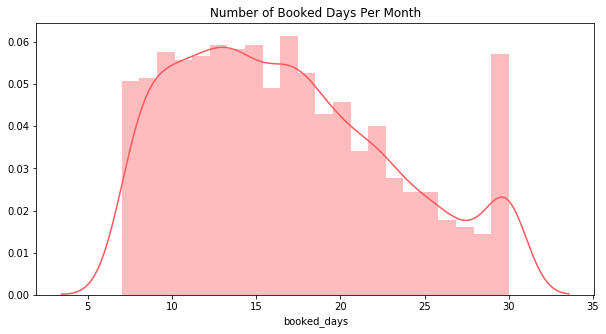

In [182]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(df['booked_days'], color='#FF585D')
ax.set_title("Number of Booked Days Per Month");

Something that really stands out here is that there are quite a number of listings that have 30 days booked. That's surprising and might warrant further investigation taking a look at these listings is important to ensure that this isn't false data.

In [183]:
df[df['booked_days'] == 30]

,listing_url,id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,neg_score,neu_score,pos_score,since_last_review,booked_days,monthly_revenue
90,https://www.airbnb.com/rooms/5564391,5564391,within a few hours,100%,t,Nakano District,Nakano Ku,35.73043,139.66592,House,...,10.0,9.0,10.0,5.09,0.0,0.000,1.000,7,30.0,893.412
103,https://www.airbnb.com/rooms/5949669,5949669,within an hour,100%,f,Koto District,Koto Ku,35.68264,139.81596,House,...,9.0,9.0,9.0,5.25,0.0,1.000,0.000,18,30.0,1369.788
140,https://www.airbnb.com/rooms/6939941,6939941,within an hour,100%,f,Koto District,Koto Ku,35.68207,139.81578,Hostel,...,10.0,9.0,9.0,5.14,0.0,0.853,0.147,15,30.0,1369.788
147,https://www.airbnb.com/rooms/7162899,7162899,within an hour,100%,t,Sumida District,Sumida Ku,35.70882,139.80080,House,...,10.0,10.0,9.0,5.08,0.0,0.213,0.787,50,30.0,1101.792
150,https://www.airbnb.com/rooms/7248668,7248668,within an hour,100%,f,Shibuya District,Shibuya Ku,35.68279,139.70702,Apartment,...,10.0,10.0,9.0,5.51,0.0,0.616,0.384,5,30.0,8278.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,https://www.airbnb.com/rooms/37625398,37625398,within an hour,100%,f,Shinjuku,Bunkyo Ku,35.73299,139.75334,Apartment,...,10.0,10.0,10.0,6.49,0.0,1.000,0.000,3,30.0,8278.896
5636,https://www.airbnb.com/rooms/37685005,37685005,within an hour,100%,f,Roppongi,Minato Ku,35.65749,139.73405,Apartment,...,10.0,10.0,10.0,6.00,0.0,0.268,0.732,5,30.0,3454.416
5638,https://www.airbnb.com/rooms/38047990,38047990,within an hour,100%,f,Sumida District,Sumida Ku,35.69423,139.81140,Apartment,...,10.0,10.0,10.0,6.00,0.0,1.000,0.000,4,30.0,8278.896
5639,https://www.airbnb.com/rooms/38087959,38087959,within an hour,100%,f,Shinagawa District,Shinagawa Ku,35.61911,139.74215,Apartment,...,10.0,10.0,10.0,6.00,0.0,1.000,0.000,2,30.0,8278.896


**Lets filter out listings that aren't good (listings that have less than 1 week of booked days)**

In [184]:
df = df[df['booked_days'] > 7 ]

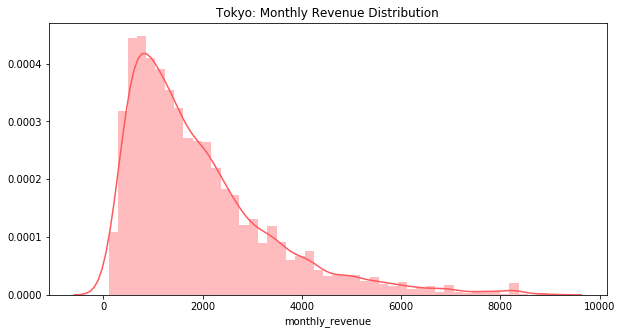

In [185]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.distplot(df['monthly_revenue'], color='#FF585D')
ax.set_title('Tokyo: Monthly Revenue Distribution');

In [186]:
df['host_neighbourhood'].unique() 

array(['Sumida District', 'Kita District', 'Shibuya District',
       'Shimokitazawa', 'Shinjuku District', 'Katsushika District',
       'Meguro District', 'Toshima District', 'Shinagawa District',
       'Setagaya District', 'Bunkyo District', 'Asakusa/Ueno',
       'Itabashi District', 'Shinjuku', 'Arakawa District',
       'Suginami District', 'Nakano District', 'Koto District',
       'Minato District', 'Edogawa District', 'Ota District',
       'Ebisu/Daikanyama', 'Nakameguro', 'Shibuya', 'Chiyoda District',
       'Aoyama', 'Ikebukuro', 'Chūō District', 'Nerima District',
       'Adachi District', 'Roppongi', 'Tsukiji', 'Soho', 'Akasaka',
       'Hibiya', 'Tsukishima', 'Nanfang Shangcheng', 'Ikuno-ku',
       'Kamigyō-ku', 'Harajuku', 'Kita-ku', 'Naniwa-ku', 'Fushimi-ku ',
       'Nishi-ku', 'Nakagyō-ku', "Da'an", 'Tennōji-ku', 'Yodogawa-ku',
       'Miyakojima-ku', 'Konohana-ku', 'Chūō-ku', 'Sakyo-ku',
       'Shimogyō-ku', 'Minami-ku'], dtype=object)

### Amenities Handling

In [187]:
def get_num_amenities(s):
    return len(s.split(','))

df['num_amenities'] = df['amenities'].apply(get_num_amenities)

In [188]:
amenities = " ".join(list(df.amenities))
amenities = amenities.replace('{', '')
amenities = amenities.replace('}', ',')
amenities = amenities.replace('"', '')
amenities_set = [x.strip() for x in amenities.split(',')]
amenities_set = set(amenities_set)
feat_amen = list(amenities_set)
feat_amen

for k in feat_amen:
    df[k] = df['amenities'].str.contains(k).astype(int)


print(df.shape)

/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(5641, 183)


/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [189]:
feat_amen

['',
 'No stairs or steps to enter',
 'Fireplace guards',
 'Lake access',
 'Hair dryer',
 'Smoke detector',
 'Pets allowed',
 'Accessible-height bed',
 'Coffee maker',
 'Bidet',
 'Paid parking off premises',
 'Family/kid friendly',
 'High chair',
 'Bathtub',
 'Babysitter recommendations',
 'Stove',
 'Dog(s)',
 'Baby monitor',
 'Extra pillows and blankets',
 '24-hour check-in',
 'Shampoo',
 'Wifi',
 'Cat(s)',
 'Free street parking',
 'Elevator',
 'Ground floor access',
 'Buzzer/wireless intercom',
 'Mobile hoist',
 'Long term stays allowed',
 'Carbon monoxide detector',
 'Game console',
 'Smart TV',
 'Netflix',
 'Cleaning before checkout',
 'Bed linens',
 'Single level home',
 'Hot tub',
 'Room-darkening shades',
 'Toilet paper',
 'Garden or backyard',
 'TV',
 'BBQ grill',
 'Shower chair',
 'Wide entrance',
 'Cable TV',
 'Walk-in shower',
 'Window guards',
 'First aid kit',
 'Fixed grab bars for toilet',
 'Memory foam mattress',
 'Roll-in shower with chair',
 'Handheld shower head',
 't

In [190]:
df['Cat(s)'].value_counts()

0    5641
Name: Cat(s), dtype: int64

In [191]:
df.dtypes

listing_url                 object
id                           int64
host_response_time          object
host_response_rate          object
host_is_superhost           object
                             ...  
Doorman                      int64
Free parking on premises     int64
Wide hallways                int64
Other pet(s)                 int64
Host greets you              int64
Length: 183, dtype: object

In [192]:
df['host_response_rate'] = df['host_response_rate'].str[:-1].astype('float64')

In [193]:
df['host_is_superhost'] = df['host_is_superhost'].str.replace('t','1')
df['host_is_superhost'] = df['host_is_superhost'].str.replace('f','0')
df['host_is_superhost'] = df['host_is_superhost'].astype(int)

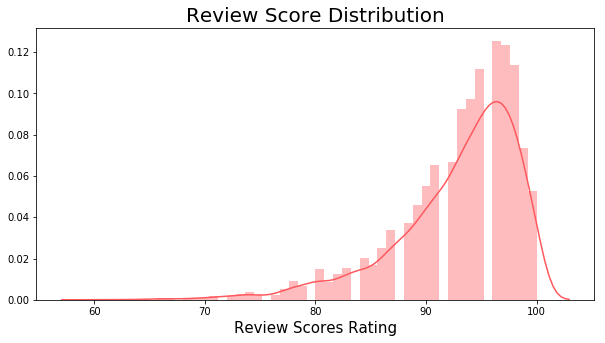

In [194]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.distplot(df['review_scores_rating'], color='#FF585D')
ax.set_title('Review Score Distribution', fontsize=20)
ax.set_xlabel("Review Scores Rating", fontsize=15);

In [195]:
amenities_df = df.iloc[:,-138:]
amenities_df['price'] = df['price']

In [196]:
amenities_df

,,No stairs or steps to enter,Fireplace guards,Lake access,Hair dryer,Smoke detector,Pets allowed,Accessible-height bed,Coffee maker,Bidet,...,translation missing: en.hosting_amenity_50,Washer,Body soap,Air purifier,Doorman,Free parking on premises,Wide hallways,Other pet(s),Host greets you,price
0,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,101.2552
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69.4876
2,1,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,89.3412
3,1,0,0,0,1,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,64.5288
4,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,78.4208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,115.1472
5637,1,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,119.1216
5638,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,275.9632
5639,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,275.9632


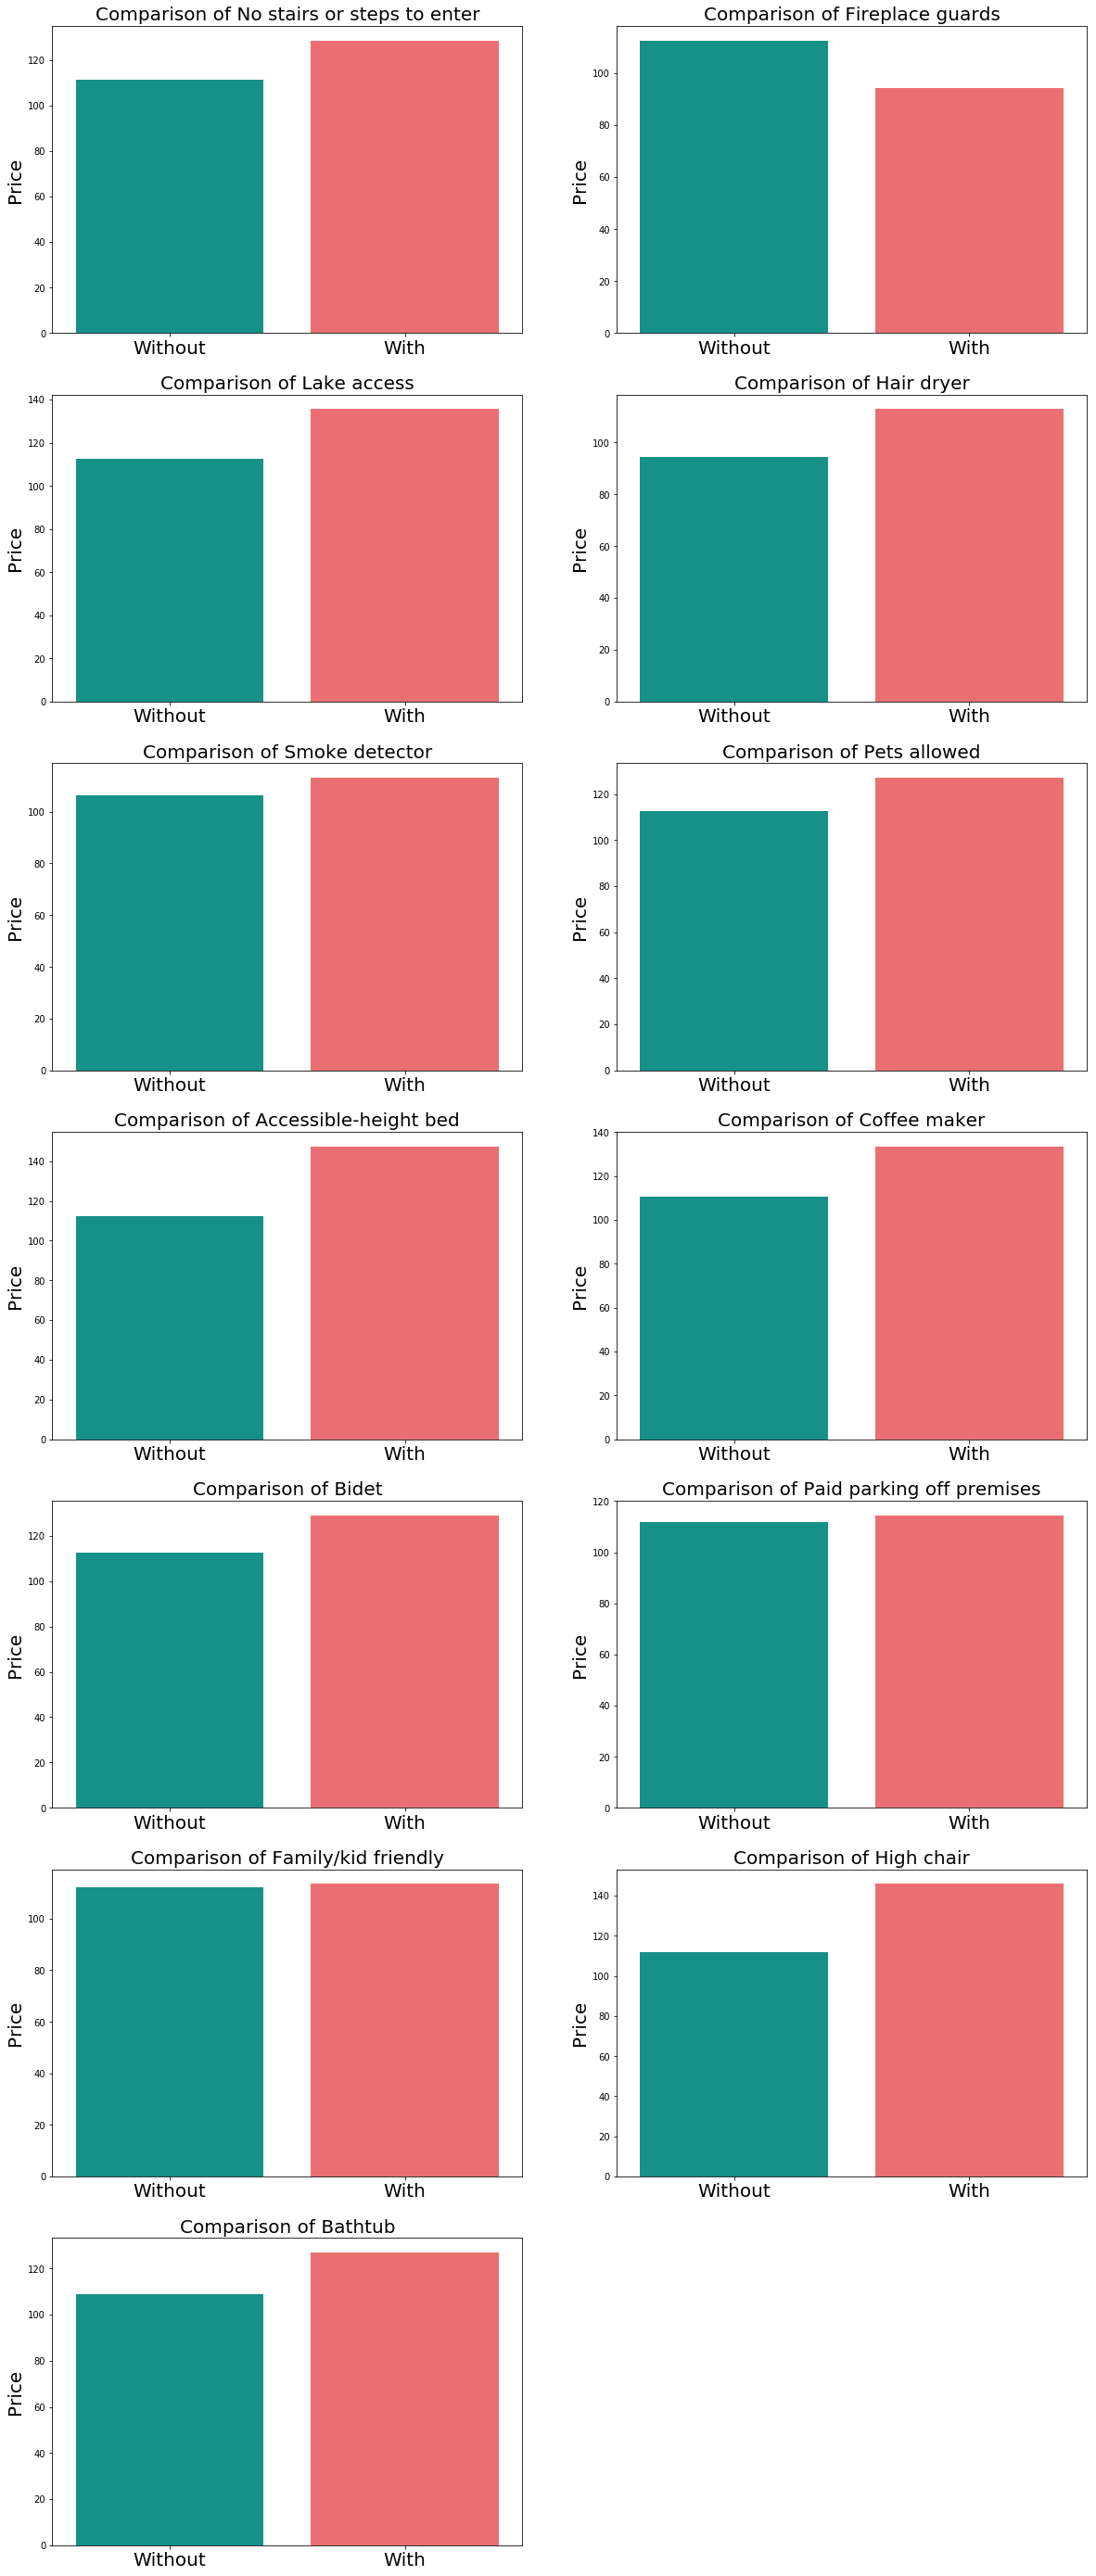

In [197]:
index = 1
fig = plt.figure(1, figsize=(20,50))
feature_amenities = feat_amen[1:14]
colors = ['#00A699','#FF5A5F']
for name in feature_amenities:
    
    current_axis = fig.add_subplot(7,2,index)
    temp = df[df[name] == 0]['price'].mean()
    temp1 = df[df[name] == 1]['price'].mean()

    x = ['Without', 'With']
    y = [temp, temp1]

    ax = sns.barplot(x=x,y=y, palette=colors);
    title = 'Comparison of ' + name
    ax.set_title(title, size=20)
    ax.set_xticklabels(['Without', 'With'], size=20)
    ax.set_ylabel('Price', size = 20)
    index +=1

## EDA

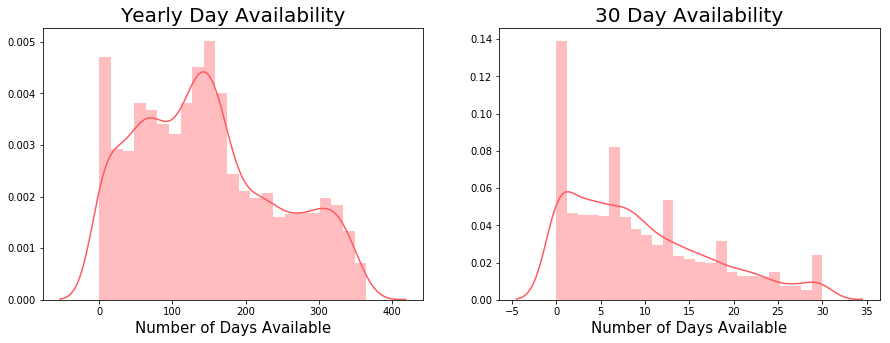

In [198]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.distplot(df['availability_365'], color='#FF5A5F', ax=axs[0]);
ax.set_title('Yearly Day Availability', fontsize=20)
ax.set_xlabel('Number of Days Available', fontsize=15);

ax = sns.distplot(df['availability_30'], color='#FF5A5F', ax=axs[1]);
ax.set_title('30 Day Availability', fontsize=20)
ax.set_xlabel('Number of Days Available', fontsize=15);

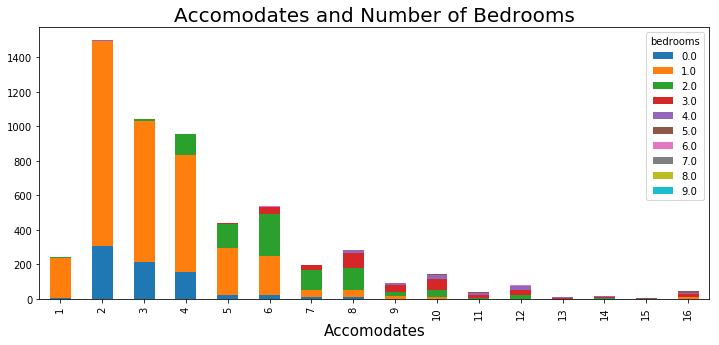

In [199]:
model1_plot = df.groupby(['accommodates', 'bedrooms']).size().reset_index().pivot(columns='bedrooms',
                                                                                  index='accommodates', values=0)

model1_plot.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("Accomodates and Number of Bedrooms", size=20)
plt.xlabel("Accomodates", size=15);

Looking at the barplot above reveals that a good majority of the listings tend to accommodate 2-6 people, mostly with 1 or 2 bedrooms.

In [200]:
subset = [2,3,4,5,6]

temp = df[df['accommodates'].isin(subset)]
temp['bedrooms'].value_counts()

1.0    3176
0.0     721
2.0     518
3.0      50
4.0       5
6.0       2
Name: bedrooms, dtype: int64

**Exploring bedroom distribution of listings that can accomodate between 2-6 people.**

In [201]:
percent_one_bed = temp['bedrooms'].value_counts().tolist()[0] / temp.shape[0] * 100
percent_studio = temp['bedrooms'].value_counts().tolist()[1] / temp.shape[0] * 100
percent_two_bed = temp['bedrooms'].value_counts().tolist()[2] / temp.shape[0] * 100

print(f'Studios make up {percent_studio:.2f}% of listings that can accommodate 2-6 people.')
print(f'One bedroom listings make up {percent_one_bed:.2f}% of listings that can accommodate 2-6 people.')
print(f'Two bedroom listings make up {percent_two_bed:.2f}% of listings that can accommodate 2-6 people.')

Studios make up 16.12% of listings that can accommodate 2-6 people.
One bedroom listings make up 71.02% of listings that can accommodate 2-6 people.
Two bedroom listings make up 11.58% of listings that can accommodate 2-6 people.


### Security Deposit

In [202]:
df['security_deposit'].describe()

count    5641.000000
mean       99.749973
std       232.833647
min         0.000000
25%         0.000000
50%         0.000000
75%       184.000000
max      5060.000000
Name: security_deposit, dtype: float64

In [203]:
df['security_deposit'].nlargest(100)

1047    5060.0000
1677    5060.0000
439     5051.4072
4646    5042.0600
1750    4817.8560
          ...    
1649     460.0000
1650     460.0000
1651     460.0000
1653     460.0000
1654     460.0000
Name: security_deposit, Length: 100, dtype: float64

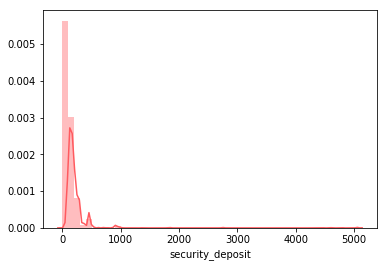

In [204]:
sns.distplot(df['security_deposit'], color='#FF5A5F');

In [205]:
df.loc[1649]

listing_url                 https://www.airbnb.com/rooms/23373523
id                                                       23373523
host_response_time                                 within an hour
host_response_rate                                            100
host_is_superhost                                               1
                                            ...                  
Doorman                                                         0
Free parking on premises                                        0
Wide hallways                                                   0
Other pet(s)                                                    0
Host greets you                                                 0
Name: 1649, Length: 183, dtype: object

In [206]:
df = df[df['security_deposit'] <= 500]

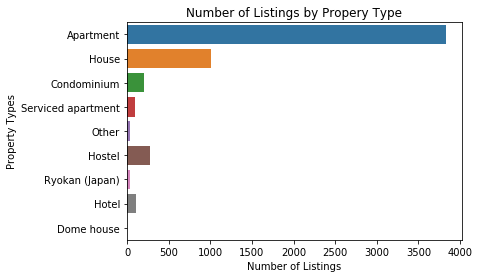

In [207]:
sns.countplot(y=df['property_type'])
plt.ylabel('Property Types')
plt.xlabel('Number of Listings')
plt.title('Number of Listings by Propery Type');

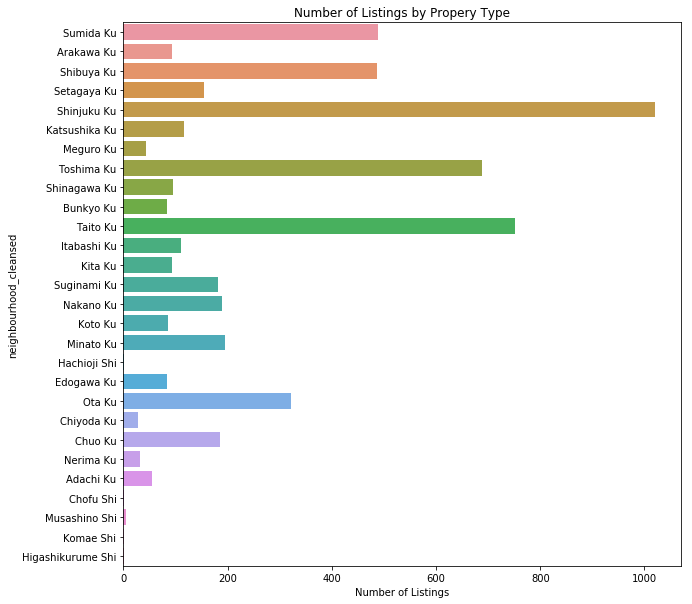

In [208]:
fig, ax = plt.subplots(figsize=(10,10)) 

ax = sns.countplot(y=df['neighbourhood_cleansed'])
plt.ylabel('neighbourhood_cleansed')
plt.xlabel('Number of Listings')
plt.title('Number of Listings by Propery Type');

In [209]:
import geopy
from geopy.distance import vincenty

tokyo_palace = (35.6852, 139.7528)
ginza_district = (35.6712, 139.7665)
sensoji_temple = (35.7148, 139.7967)
ueno_park = (35.7155, 139.7741)
tokyo_skytree = (35.7101, 139.8107)


def get_palace_distance(src):
    tokyo_palace = (35.6852, 139.7528)
    return geopy.distance.distance(src, tokyo_palace).meters

def get_ginza_distance(src):
    ginza_district = (35.6712, 139.7665)
    return geopy.distance.distance(src, ginza_district).meters

def get_temple_distance(src):
    sensoji_temple = (35.7148, 139.7967)
    return geopy.distance.distance(src, sensoji_temple).meters

def get_park_distance(src):
    ueno_park = (35.7155, 139.7741)
    return geopy.distance.distance(src, ueno_park).meters

def get_skytree_distance(src):
    tokyo_skytree = (35.7101, 139.8107)
    return geopy.distance.distance(src, tokyo_skytree).meters

In [210]:
df['lat_long'] = list(zip(df['latitude'], df['longitude']))
df['palace_dist'] = df['lat_long'].apply(get_palace_distance)
df['ginza_dist'] = df['lat_long'].apply(get_ginza_distance)
df['temple_dist'] = df['lat_long'].apply(get_temple_distance)
df['park_dist'] = df['lat_long'].apply(get_park_distance)
df['skytree_dist'] = df['lat_long'].apply(get_skytree_distance)

In [211]:
df[['latitude', 'longitude', 'lat_long', 'palace_dist']].head()

,latitude,longitude,lat_long,palace_dist
0,35.71721,139.82596,"(35.717209999999994, 139.82596)",7513.579496
1,35.73818,139.77009,"(35.73818, 139.77008999999998)",6082.978847
2,35.67968,139.67949,"(35.67968, 139.67949)",6664.499962
3,35.65833,139.67153,"(35.65833, 139.67153000000002)",7938.897330
4,35.69098,139.70618,"(35.690979999999996, 139.70618000000002)",4268.373312


In [212]:
h = df.groupby(['bedrooms', 'accommodates']).agg({'price' : 'mean'})

h.sort_values(by=['price'], ascending=False, inplace=True)

h.reset_index(inplace=True)

h[h['bedrooms'] == 1]

,bedrooms,accommodates,price
30,1.0,11,199.201467
43,1.0,12,174.379867
54,1.0,8,148.393756
57,1.0,6,139.826939
58,1.0,9,138.898769
62,1.0,7,129.497667
63,1.0,10,128.651880
66,1.0,5,125.359825
68,1.0,4,105.227815
70,1.0,3,90.687304


In [213]:
df

,listing_url,id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,...,Free parking on premises,Wide hallways,Other pet(s),Host greets you,lat_long,palace_dist,ginza_dist,temple_dist,park_dist,skytree_dist
0,https://www.airbnb.com/rooms/197677,197677,within a day,100.0,1,Sumida District,Sumida Ku,35.71721,139.82596,Apartment,...,0,0,0,0,"(35.717209999999994, 139.82596)",7513.579496,7417.810752,2661.084760,4696.409605,1590.312028
1,https://www.airbnb.com/rooms/776070,776070,within an hour,100.0,1,Kita District,Arakawa Ku,35.73818,139.77009,House,...,0,0,0,0,"(35.73818, 139.77008999999998)",6082.978847,7438.766049,3539.136814,2542.453677,4817.368015
2,https://www.airbnb.com/rooms/905944,905944,within an hour,95.0,1,Shibuya District,Shibuya Ku,35.67968,139.67949,Apartment,...,0,0,0,0,"(35.67968, 139.67949)",6664.499962,7933.153958,11301.364119,9440.211966,12346.096121
3,https://www.airbnb.com/rooms/1016831,1016831,within a few hours,100.0,1,Shimokitazawa,Setagaya Ku,35.65833,139.67153,House,...,0,0,0,0,"(35.65833, 139.67153000000002)",7938.897330,8716.697715,12947.277243,11244.471333,13845.629774
4,https://www.airbnb.com/rooms/1096292,1096292,within a day,100.0,1,Shinjuku District,Shinjuku Ku,35.69098,139.70618,House,...,0,0,0,1,"(35.690979999999996, 139.70618000000002)",4268.373312,5885.015482,8607.893109,6721.937428,9694.372231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,https://www.airbnb.com/rooms/37685005,37685005,within an hour,100.0,0,Roppongi,Minato Ku,35.65749,139.73405,Apartment,...,0,0,0,0,"(35.65749, 139.73405)",3512.019221,3308.582525,8520.225572,7387.146579,9067.338234
5637,https://www.airbnb.com/rooms/37796987,37796987,within an hour,100.0,0,Shinjuku District,Shinjuku Ku,35.70137,139.71304,Apartment,...,0,1,0,0,"(35.701370000000004, 139.71303999999998)",4021.164809,5884.133653,7716.045139,5743.695914,8890.902498
5638,https://www.airbnb.com/rooms/38047990,38047990,within an hour,100.0,0,Sumida District,Sumida Ku,35.69423,139.81140,Apartment,...,0,0,0,0,"(35.69423, 139.8114)",5398.007156,4800.988940,2641.731157,4118.753912,1761.971124
5639,https://www.airbnb.com/rooms/38087959,38087959,within an hour,100.0,0,Shinagawa District,Shinagawa Ku,35.61911,139.74215,Apartment,...,0,0,0,0,"(35.61911, 139.74215)",7396.006513,6185.953317,11709.666542,11079.067715,11850.957830


In [214]:
df.describe()

,id,host_response_rate,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,Doorman,Free parking on premises,Wide hallways,Other pet(s),Host greets you,palace_dist,ginza_dist,temple_dist,park_dist,skytree_dist
count,5.587000e+03,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,...,5587.000000,5587.000000,5587.000000,5587.0,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000
mean,2.618842e+07,99.079470,0.362270,35.695206,139.735517,4.297476,1.219348,1.232683,2.766601,112.594158,...,0.002685,0.025416,0.060498,0.0,0.083229,6499.475875,7318.291246,7728.824901,6871.213517,8478.071911
std,7.686291e+06,3.331239,0.480699,0.043454,0.054753,2.768280,0.667106,0.895898,2.057952,64.892375,...,0.051750,0.157399,0.238428,0.0,0.276253,3038.912523,3034.373347,4842.042861,4223.832523,4994.836608
min,1.976770e+05,0.000000,0.000000,35.540730,139.285650,1.000000,0.000000,0.000000,0.000000,9.926800,...,0.000000,0.000000,0.000000,0.0,0.000000,1287.628190,229.476180,94.270049,414.709908,30.741674
25%,2.182085e+07,100.000000,0.000000,35.681685,139.697005,2.000000,1.000000,1.000000,1.000000,64.528800,...,0.000000,0.000000,0.000000,0.0,0.000000,4626.491151,5578.573368,3197.112169,3733.103124,3562.160990
50%,2.849692e+07,100.000000,0.000000,35.702250,139.722510,4.000000,1.000000,1.000000,2.000000,92.322000,...,0.000000,0.000000,0.000000,0.0,0.000000,5818.317478,6988.562082,8172.273566,6421.320748,9290.786021
75%,3.180934e+07,100.000000,1.000000,35.723760,139.783775,6.000000,1.000000,1.000000,4.000000,146.914800,...,0.000000,0.000000,0.000000,0.0,0.000000,7441.571124,8766.750649,10618.045168,9079.838320,11657.187755
max,3.836502e+07,100.000000,1.000000,35.797070,139.900370,16.000000,9.500000,9.000000,36.000000,299.791200,...,1.000000,1.000000,1.000000,0.0,1.000000,42634.144185,43707.342103,47061.394452,45066.272409,48219.046350


In [215]:
df.isna().sum()

listing_url           0
id                    0
host_response_time    0
host_response_rate    0
host_is_superhost     0
                     ..
palace_dist           0
ginza_dist            0
temple_dist           0
park_dist             0
skytree_dist          0
Length: 189, dtype: int64

In [216]:
df.to_pickle('processed_data.pkl')